### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [2]:
%matplotlib inline 
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats import zscore
from sklearn.cluster import KMeans
data = pd.read_csv("vehicle.csv") 
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
data.dropna(inplace=True)
data.sample(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
420,96,39.0,58.0,117.0,51.0,6,133.0,52.0,18.0,139,154.0,255.0,150.0,86.0,6.0,0.0,181.0,182,van
228,105,54.0,106.0,215.0,68.0,10,208.0,32.0,24.0,166,217.0,640.0,218.0,69.0,14.0,23.0,189.0,199,car
374,87,36.0,53.0,117.0,58.0,4,118.0,57.0,17.0,125,138.0,205.0,138.0,85.0,9.0,15.0,180.0,183,van
439,98,47.0,109.0,202.0,59.0,11,199.0,34.0,23.0,154,207.0,586.0,165.0,61.0,1.0,33.0,194.0,208,car
303,89,36.0,68.0,149.0,60.0,8,133.0,50.0,18.0,134,153.0,265.0,119.0,62.0,6.0,18.0,201.0,209,van


### 2. Print/ Plot the dependent (categorical variable) - Class column

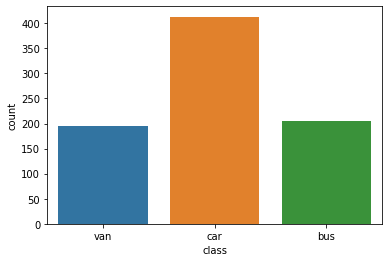

In [0]:
sns.countplot(x="class", data=data)

Since the variable is categorical, you can use value_counts function

In [0]:
data["class"].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [0]:
data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [4]:
X=data.drop(columns="class", axis=1)

In [5]:
from scipy.stats import zscore
X_scaled= zscore(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [6]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 11)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     
  centroids = clusters.cluster_centers_         
  cluster_errors.append( clusters.inertia_)

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [7]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5740.555574
4,5,5209.977811
5,6,4707.810964
6,7,4415.731041
7,8,4089.894296
8,9,3846.071268
9,10,3653.057073


## 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

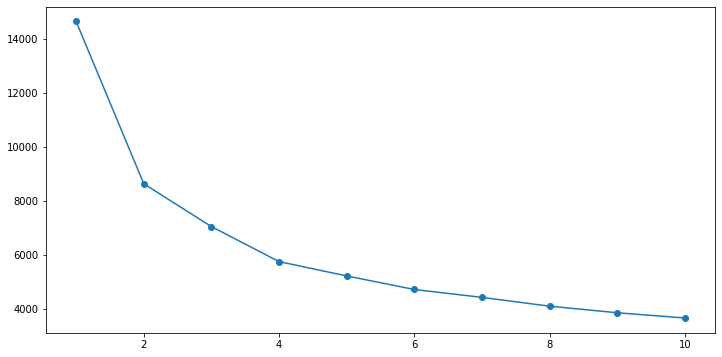

In [8]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

As per graph, there is clear bend on **2** value. So till the final outcome we assume that the optimum value is **2**.

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [10]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X)
centroids = kmeans.cluster_centers_
print("Centroid values")
print(centroids)

Centroid values
[[ 1.05786955  1.0942143   1.13708639  1.00301249  0.228961    0.30882445
   1.19967951 -1.14399738  1.20316373  1.01289926  1.15326048  1.20473969
   1.00470068 -0.07913426  0.14044464  0.24767096  0.0697104   0.23226373]
 [-0.56180643 -0.58110816 -0.60387639 -0.5326733  -0.12159511 -0.16400847
  -0.63711793  0.60754663 -0.63896831 -0.5379239  -0.61246602 -0.63980526
  -0.53356985  0.04202611 -0.07458642 -0.13153147 -0.03702134 -0.1233491 ]]


You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [11]:
centroids_df= pd.DataFrame(centroids, columns=list(X))
centroids_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.057870,1.094214,1.137086,1.003012,0.228961,0.308824,1.199680,-1.143997,1.203164,1.012899,1.153260,1.204740,1.004701,-0.079134,0.140445,0.247671,0.069710,0.232264
1,-0.561806,-0.581108,-0.603876,-0.532673,-0.121595,-0.164008,-0.637118,0.607547,-0.638968,-0.537924,-0.612466,-0.639805,-0.533570,0.042026,-0.074586,-0.131531,-0.037021,-0.123349


### Use kmeans.labels_ function to print out the labels of the classes

In [12]:
X['labels'] = kmeans.labels_
X.groupby(["labels"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
labels,,,,,,,,,,,,,,,,,,
0,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282
1,531,531,531,531,531,531,531,531,531,531,531,531,531,531,531,531,531,531


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [13]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [14]:
concatenate = np.concatenate([a,b,c])
data=pd.DataFrame(concatenate, columns=['x', 'y'])
data.head(5)

,x,y
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773


In [15]:
data.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214CA560908>,
      dtype=object)

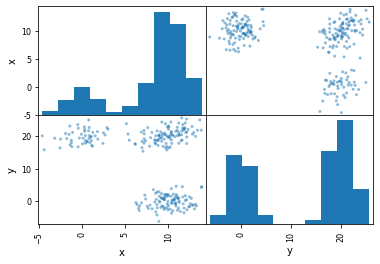

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)

### 11. Find out the linkage matrix

In [0]:
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [18]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
Z = linkage(data, 'ward', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(data))
print("Ward",c)

Ward 0.9536963071171022


### 12. Plot the dendrogram for the consolidated dataframe

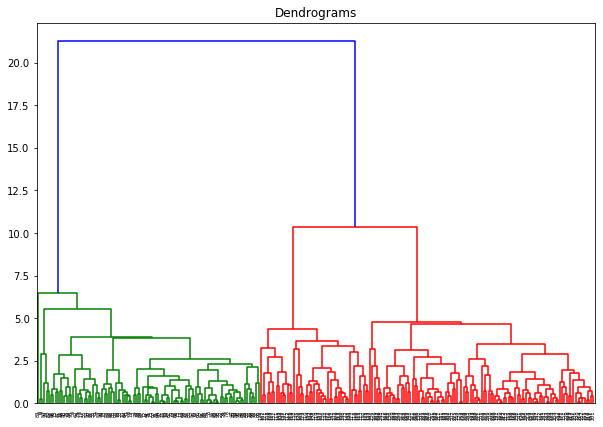

In [19]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='average'))

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

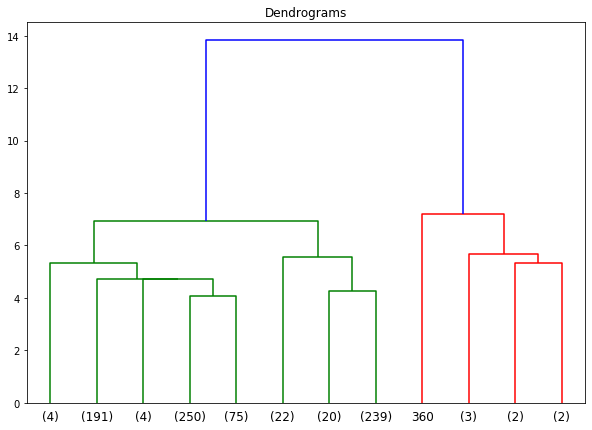

In [20]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='average'), truncate_mode='lastp', p=12)

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [0]:
https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 